In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [24]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [25]:
df_subset = df[['area','rooms','price']]
df_subset.head()

,area,rooms,price
0,108,3,510000
1,47,2,215000
2,116,3,325000
3,58,3,315000
4,63,3,200000


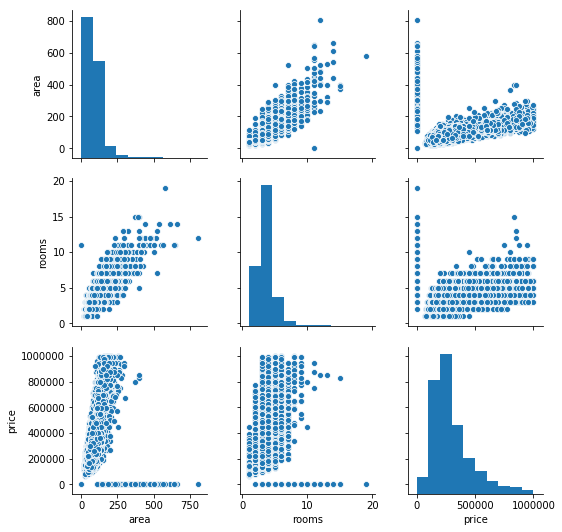

In [26]:
sns.pairplot(df_subset)
plt.show()

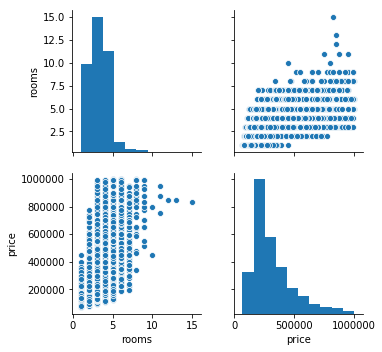

In [30]:
df_subset = df[(df['price'] > 30000) & (df['area'] > 10) & (df['rooms'] > 0)] #we want to subset the original dataset, otherwise we lose data
df_sel = df[['rooms', 'price']]

sns.pairplot(df_sel)
plt.show()

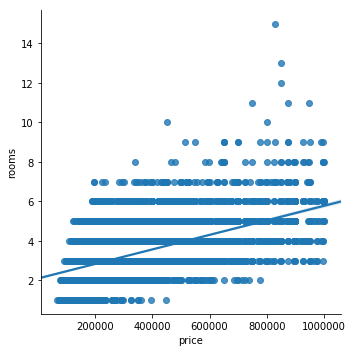

In [31]:

sns.lmplot(x='price', y='rooms', data=df_subset) 

plt.show()

Their is a linearity between the price and the number of rooms. When their are more rooms the price is rising too.

In [32]:
pearsonr(df_subset['price'],df_subset['rooms'])

(0.540555973731477, 0.0)

The correlation between price and rooms is moderated uphill (positive) relationship

It is also highly significant: P < 0,001

In [36]:
df_subset = df.sort_values(by='price', ascending=False) #sort the data set to see the biggest channels first

df_subset.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
2061,2061,Valeriusplein 40 I,205,3,1075 BJ,12-2-2016,999999,apartment,5,11-4-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
4582,4582,Eerste Passeerdersdwarsstraat 98,175,3,1016 XD,11-2-2016,999500,apartment,5,22-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1945
498,498,Buiksloterdijk 236,253,5,1025 WE,9-3-2016,999000,house,8,19-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1985
6350,6350,Lomanstraat 33 HS,182,3,1075 PT,17-9-2015,999000,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
6236,6236,Apollolaan 67 III-IV,193,5,1077 AH,3-12-2015,999000,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
4339,4339,Raphaëlstraat 24,158,4,1077 PV,30-1-2016,998000,apartment,6,18-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1932
3248,3248,Langestraat 46,178,3,1015 AL,10-11-2015,998000,house,6,26-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1906
7854,7854,Johannes Verhulststraat 186 bv,172,5,1075 HD,29-8-2015,995000,apartment,8,2-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1908
264,264,Tweede Helmersstraat 51 III,147,3,1054 CD,4-6-2016,995000,apartment,6,20-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
7049,7049,Jacob van Lennepkade 21 II,154,3,1054 ZE,11-9-2015,995000,apartment,4,18-11-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


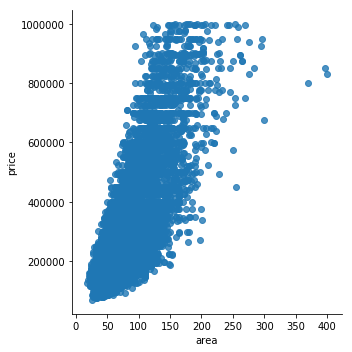

In [47]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df_subset)

In [66]:
from sklearn.linear_model import LinearRegression 

x = df_subset[['area']] 
y = df_subset['price']
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.coef_[0] 
b1 = lm.intercept_ 

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3498.81 + 27983.93X


In [61]:
df_subset['price_p'] = lm.predict(x)

In [64]:
df_subset

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,area_p,price_p
2061,2061,Valeriusplein 40 I,205,3,1075 BJ,12-2-2016,999999,apartment,5,11-4-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,745240.873683,745240.873683
4582,4582,Eerste Passeerdersdwarsstraat 98,175,3,1016 XD,11-2-2016,999500,apartment,5,22-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1945,640276.442881,640276.442881
498,498,Buiksloterdijk 236,253,5,1025 WE,9-3-2016,999000,house,8,19-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1985,913183.962967,913183.962967
6350,6350,Lomanstraat 33 HS,182,3,1075 PT,17-9-2015,999000,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,664768.143402,664768.143402
6236,6236,Apollolaan 67 III-IV,193,5,1077 AH,3-12-2015,999000,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,703255.101362,703255.101362
4339,4339,Raphaëlstraat 24,158,4,1077 PV,30-1-2016,998000,apartment,6,18-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1932,580796.598760,580796.598760
3248,3248,Langestraat 46,178,3,1015 AL,10-11-2015,998000,house,6,26-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1906,650772.885961,650772.885961
7854,7854,Johannes Verhulststraat 186 bv,172,5,1075 HD,29-8-2015,995000,apartment,8,2-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1908,629779.999801,629779.999801
264,264,Tweede Helmersstraat 51 III,147,3,1054 CD,4-6-2016,995000,apartment,6,20-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,542309.640799,542309.640799
7049,7049,Jacob van Lennepkade 21 II,154,3,1054 ZE,11-9-2015,995000,apartment,4,18-11-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,566801.341319,566801.341319
